In [ ]:
import pandas as pd
import numpy as np
import random
import time
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from xgboost.sklearn import XGBRegressor
from sklearn.metrics import make_scorer, accuracy_score, mean_squared_error, r2_score, mean_absolute_percentage_error

In [ ]:
data = pd.read_csv('/content/Housing.csv')
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
data.isna().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [ ]:
data.describe(include='all')

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545,545,545,545,545,545.000000,545,545
unique,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,NaN,2,3
top,NaN,NaN,NaN,NaN,NaN,yes,no,no,no,no,NaN,no,semi-furnished
freq,NaN,NaN,NaN,NaN,NaN,468,448,354,520,373,NaN,417,227
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,NaN,NaN,NaN,NaN,NaN,0.693578,NaN,NaN
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,NaN,NaN,NaN,NaN,NaN,0.861586,NaN,NaN
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN


In [ ]:
data['furnishingstatus'].value_counts()

,count
furnishingstatus,
semi-furnished,227
unfurnished,178
furnished,140


In [ ]:
data.replace({'yes':1, 'no':0}, inplace = True)

In [ ]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [ ]:
data2 = pd.get_dummies(data, columns=['furnishingstatus'])

In [ ]:
data2.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,True,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,True,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,False,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,True,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,True,False,False


In [ ]:
data2.replace({True:1, False: 0}, inplace = True)
data2.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0,0


In [ ]:
X = data2.drop(['price'], axis = 1)
y = data2['price'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
xgb_model = XGBRegressor(
    n_estimators=100,      # Number of boosting rounds
    learning_rate=0.1,     # Step size shrinkage used in update to prevent overfitting
    max_depth=4,           # Maximum depth of a tree
    subsample=0.8,         # Subsample ratio of the training instances
    colsample_bytree=0.8,  # Subsample ratio of columns when constructing each tree
    random_state=42        # Seed for reproducibility
)

In [ ]:
def simulated_annealing_mape(X, y, initial_temp, coolingfactor, beta, max_iter):
  all_solution = []
  all_mape = []

  current_solution = [random.randint(0, 1) for _ in range(0, len(X.columns))]
  features = X.columns
  selected_features = [features[i] for i in range(0, len(X.columns)) if current_solution[i] == 1]
  X_feat = X[selected_features]
  cv_scores = cross_val_score(xgb_model, X_feat, y, cv=5, scoring='neg_mean_absolute_percentage_error')
  current_mape = -np.mean(cv_scores)

  all_solution.append(current_solution)
  all_mape.append(current_mape)

  for iter_num in range(0, max_iter):
    if iter_num == 0:
      temp = initial_temp
    elif iter_num == beta:
      temp = initial_temp*(coolingfactor**iter_num)

    k = random.choice(range(0,len(current_solution)))
    new_solution = current_solution.copy()
    new_solution[k] = 1 - new_solution[k]

    selected_features = [features[i] for i in range(0, len(X.columns)) if new_solution[i] == 1]
    X_feat = X[selected_features]
    cv_scores = cross_val_score(xgb_model, X_feat, y, cv=5, scoring='neg_mean_absolute_percentage_error')
    new_mape = -np.mean(cv_scores)

    if new_mape < current_mape:
      current_solution = new_solution.copy()
      current_mape = new_mape

      all_solution.append(current_solution)
      all_mape.append(current_mape)

    elif random.random() < np.exp(-abs(new_mape - current_mape) / temp):
      current_solution = new_solution.copy()
      current_mape = new_mape

      all_solution.append(current_solution)
      all_mape.append(current_mape)

    else:
      all_solution.append(current_solution)
      all_mape.append(current_mape)
      continue

  return all_solution, all_mape

In [ ]:
start = time.time()
max_iter = 1000
all_solution, all_mape = simulated_annealing_mape(X_train, y_train, 10, 0.95, 50, max_iter)
end = time.time()
print("Time taken:", (end-start)/60)

Time taken: 4.922355043888092


<Axes: >

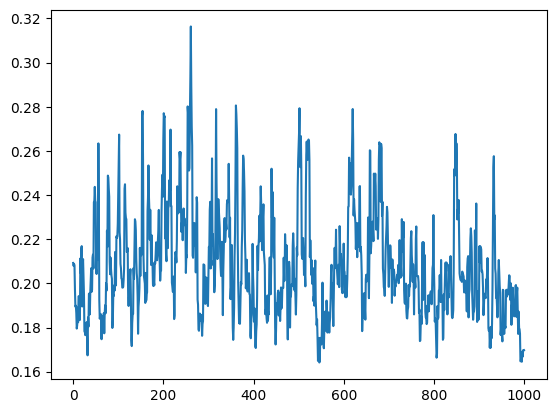

In [ ]:
sns.lineplot(x=range(0,max_iter + 1), y=all_mape)

In [ ]:
print(len(all_solution), len(all_mape))

1001 1001


In [ ]:
best_mape = np.min(all_mape)
print(best_mape)

0.16416625590715062


In [ ]:
best_solution = [all_solution[i] for i in range(0, len(all_solution)) if all_mape[i] == best_mape][0]

In [ ]:
best_solution

[1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1]

In [ ]:
features = X_train.columns
selected_features = [features[i] for i in range(0, len(features)) if best_solution[i] == 1]
X_feat = X_train[selected_features]
cv_scores = cross_val_score(xgb_model, X_feat, y_train, cv=5, scoring='neg_mean_absolute_percentage_error')
mape = -np.mean(cv_scores)
print(mape)

0.16416625590715062


In [ ]:
xgb_model.fit(X_train[selected_features], y_train)
y_pred = xgb_model.predict(X_test[selected_features])
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
adjusted_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
mse = mean_squared_error(y_test, y_pred)
print("mape:",mape)
print("mse:",mse)
print("R squared:",r2)
print("Adjusted R squared:",adjusted_r2)

mape: 0.22786496840510145
mse: 2192508301825.0774
R squared: 0.5662324995079242
Adjusted R squared: 0.5016288292218704
